In [1]:
import pandas as pd
import numpy as np

In [2]:
df_path = '../data/data.csv'
df = pd.read_csv(df_path)

In [3]:
df

,name,name-formatted,url,text,tokenized_text
0,Aeres University of Applied Sciences,aeres-university-of-applied-sciences,https://www.aeres.eu/about-privacy/privacy-sta...,Aeres handles your data with care. Below we ex...,"['Aeres', 'handles', 'your', 'data', 'with', '..."
1,Amsterdam Fashion Academy,amsterdam-fashion-academy,https://www.amsterdamfashionacademy.com/privac...,Privacy Policy\nAmsterdam Fashion Academy (AFA...,"['Privacy', 'Policy', 'Amsterdam', 'Fashion', ..."
2,Amsterdam University of Applied Sciences,amsterdam-university-of-applied-sciences,https://www.amsterdamuas.com/home/disclaimers/...,"Privacy\nPrivacy Statement, Cookies and Cookie...","['Privacy', 'Privacy', 'Statement', 'Cookies',..."
3,Amsterdam University of the Arts,amsterdam-university-of-the-arts,https://www.ahk.nl/en/contact/privacy/,Your personal data and your privacy\nThe Amste...,"['Your', 'personal', 'data', 'and', 'your', 'p..."
4,Amsterdamse Hogeschool voor de Kunsten,amsterdamse-hogeschool-voor-de-kunsten,https://www.hku.nl/en/privacy-statement-discla...,HKU processes personal data in accordance with...,"['HKU', 'processes', 'personal', 'data', 'in',..."
...,...,...,...,...,...
70,Wageningen University & Research,wageningen-universiteit-and-research,https://www.wur.nl/en/value-creation-cooperati...,Research data sharing and guidelines\nData sha...,"['Research', 'data', 'sharing', 'and', 'guidel..."
71,Webster Leiden,webster-leiden,https://www.webster.edu/privacy-security/priva...,"GDPR determines circumstances for collecting, ...","['GDPR', 'determines', 'circumstances', 'for',..."
72,Windesheim University of Applied Sciences,windesheim-university-of-applied-sciences,NaN,NaN,[]
73,Wittenborg University of Applied Sciences,hogeschool-wittenborg,https://www.wittenborg.eu/privacy-notices-witt...,Wittenborg University of Applied Sciences need...,"['Wittenborg', 'University', 'of', 'Applied', ..."


In [4]:
def jaccard_similarity(text1, text2):
    set1 = set(text1)
    set2 = set(text2)

    intersection = set1.intersection(set2)
    union = set1.union(set2)

    return len(intersection)/len(union)

In [21]:
df_no_na = df.dropna()
texts = df_no_na['tokenized_text'].to_numpy()

similarities = np.zeros([df_no_na.shape[0], df_no_na.shape[0]])
similarities_for_hist = []

for i in range(len(texts)):
    text1 = df.iloc[i]['tokenized_text']
    for j in range(i, len(texts)):
        text2 = df.iloc[j]['tokenized_text']
        similarity = jaccard_similarity(text1, text2)
        similarities[i, j] = similarity
        similarities[j, i] = similarity
        similarities_for_hist.append(similarity)


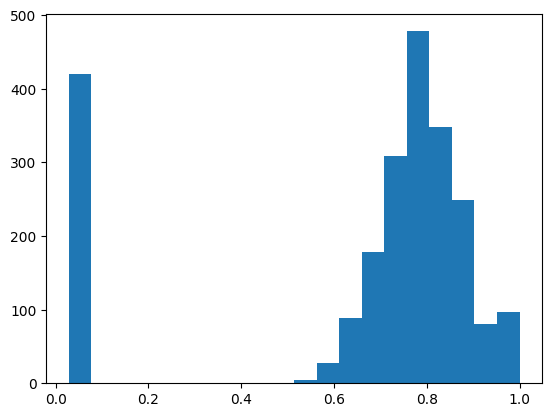

In [26]:
import matplotlib.pyplot as plt
_ = plt.hist(similarities_for_hist, bins=20)

<Axes: >

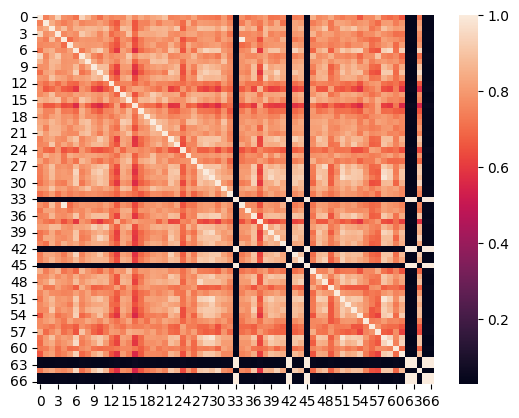

In [6]:
for i in range(0, 10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [ ]:
text1 = df.iloc[4]['tokenized_text']
text2 = df.iloc[34]['tokenized_text']

jaccard_similarity(text1, text2)

1.0